In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/tbrownex/Hackett/Banstead/Banstead_data.csv",encoding='latin-1')

In [3]:
rows = df.shape[0]
print("File has {:,.0f} rows".format(rows))

File has 64,973 rows


In [4]:
# Confirm all columns have a value for all rows
for x in df.columns:
    if rows != df[x].count():
        print("missing values for column: ", x)

In [5]:
for x in df.columns: print(x)

Business Unit Number
Business Unit Long Name
Trading Week
Layout Group
Layout Group Name
Line Sales SUs
Full Price Sales
Offers
Reductions
Line Sales
Line Cost of Sales
Line Sales VAT
Contribution 1
Line Expl Wstg @ cost
Contribution 2
Apportioned Bonuses
Contribution 3


In [6]:
# See how many unique values by column
for x in df.columns:
    print("{:<25}{}".format(x, len(df[x].unique())))

Business Unit Number     1
Business Unit Long Name  1
Trading Week             274
Layout Group             334
Layout Group Name        341
Line Sales SUs           16537
Full Price Sales         52962
Offers                   27556
Reductions               14326
Line Sales               54415
Line Cost of Sales       58074
Line Sales VAT           26093
Contribution 1           58609
Line Expl Wstg @ cost    27537
Contribution 2           58674
Apportioned Bonuses      44422
Contribution 3           60293


##### Trading Week

In [7]:
# Looks like the Category columns are Trading Week, Layout Group and Layout Name
print(df["Trading Week"].unique()[:10])
print("\n")

# Trading Week
min1 = df["Trading Week"].min()
max1 = df["Trading Week"].max()
print("Trading Week range: {} - {}".format(min1,max1))

['2013(01)' '2013(02)' '2013(03)' '2013(04)' '2013(05)' '2013(06)'
 '2013(07)' '2013(08)' '2013(09)' '2013(10)']


Trading Week range: 2013(01) - 2018(13)


##### Layout Group

In [8]:
# Looks like the Category columns are Trading Week, Layout Group and Layout Name
print(df["Layout Group"].unique()[:10])
print("\n")

# Trading Week
min1 = df["Layout Group"].min()
max1 = df["Layout Group"].max()
print("Layout Group range: {} - {}".format(min1,max1))

[  1   2   3   5   6   7 104 106 107 108]


Layout Group range: 1 - 905


##### Do all weeks have the same Layout Groups?

In [9]:
maximum = 0
svWeek = None
uniqueTW = df["Trading Week"].unique()

for x in uniqueTW:
    tmp = df.loc[df["Trading Week"]==x]
    tmp = tmp["Layout Group"].unique()
    count = tmp.shape[0]
    if count > maximum:
        maximum = count
        svWeek = x
print("maximum LG per week is ", svWeek, maximum)

minimum = 999

for x in uniqueTW:
    tmp = df.loc[df["Trading Week"]==x]
    tmp = tmp["Layout Group"].unique()
    count = tmp.shape[0]
    if count < minimum:
        minimum = count
        svWeek = x
print("minimum LG per week is ", svWeek, minimum)

maximum LG per week is  2014(52) 265
minimum LG per week is  2013(28) 223


##### Is there a 1:1 between Layout Group and Layout Group Name?

In [10]:
uniqueLG = df["Layout Group"].unique()

for x in uniqueLG:
    tmp = df.loc[df["Layout Group"]==x]
    LGname = tmp["Layout Group Name"].unique()
    if len(LGname) > 1: print(x,LGname)

104 ['TINNED LOAVES (CRUSTY)' 'TINNED LOOSE BREAD (CRUSTY)']
25 ['HEALTH DRINKS' 'ACTIVE HEALTH DRINKS']
250 ['LAGER' 'BEERS & LAGERS']
252 ['SPECIALITY BEER' 'WORLD BEERS']
254 ['ALES' 'PREMIUM BOTTLED ALES']
40 ['NOT IN USE' 'SPECIALITY MEAT']
444 ['IMPULSE CONSUMER ELECTRONICS' 'LAUNDRY ACCESSORIES']
445 ['Impulse Free From' 'LAUNDRY ADDITIVES']
457 ['CHRISTMAS ODO BEEF STUNT LINE' 'PETCARE']
465 ['LAUNDRY' 'LAUNDRY DETERGENTS']
89 ['ARTISAN BREAD (BRANDED & WR1)' 'Branded and Rustic Bread (Loose)'
 'Branded and Rustic Artisan Bread']
331 ['Seasonal Gifting FPU' 'FOOD GIFTING']
299 ['NOT IN USE (WAS MENSWEAR)' 'MENSWEAR']
167 ['FORMATTED CAFE' 'CAFE BREAKFAST']


##### Is there a minimum set of Layout Groups that are common to all Weeks?

In [11]:
# Minimum count of LG/Week (from above) is in week "2013(28)"
tmp   = df.loc[df["Trading Week"]=="2013(28)"]
LGmin = tmp["Layout Group"].unique()

for wk in uniqueTW:
    tmp = df.loc[df["Trading Week"]==wk]["Layout Group"]
    tom = np.empty(0, dtype=int)
    for lg in LGmin:
        count = np.isin(tmp, lg, assume_unique=True).sum()
        if count ==1:
            tom = np.append(tom, lg)
    LGmin = tom

print("There are {} Layout Groups shared by all Weeks".format(len(LGmin)))

In [14]:
'''for W in uniqueTW:
    for LG in LGmin:
        tmp = df.loc[df["Trading Week"]==W]
        tmp = tmp.loc[tmp["Layout Group"]== LG]
        if tmp.shape[0] < 1:
            print(W, LG)'''

'for W in uniqueTW:\n    for LG in LGmin:\n        tmp = df.loc[df["Trading Week"]==W]\n        tmp = tmp.loc[tmp["Layout Group"]== LG]\n        if tmp.shape[0] < 1:\n            print(W, LG)'

##### Select only the minimum Layout Groups (common to all weeks)

In [15]:
subset = df.loc[df['Layout Group'].isin(LGmin)]

##### Ignore data prior to the store remodeling (everything pre-2017 week 22), then split out the parking lot disruption weeks (30-34)

In [19]:
configDates = ['2017(22)','2017(23)','2017(24)','2017(25)','2017(26)',
           '2017(27)','2017(28)','2017(29)', '2017(30)','2017(31)',
           '2017(32)','2017(33)','2017(34)','2017(35)','2017(36)',
           '2017(37)', '2017(38)', '2017(39)', '2017(40)', '2017(41)',
           '2017(42)', '2017(43)', '2017(44)', '2017(45)', '2017(46)',
           '2017(47)', '2017(48)', '2017(49)', '2017(50)', '2017(51)',
           '2017(52)', '2018(01)', '2018(02)', '2018(03)', '2018(04)',
           '2018(05)', '2018(06)', '2018(07)', '2018(08)', '2018(09)',
           '2018(10)', '2018(11)', '2018(12)', '2018(13)']

noParking = ['2017(30)','2017(31)','2017(32)','2017(33)','2017(34)']
               
parking = ['2017(22)','2017(23)','2017(24)','2017(25)','2017(26)',
         '2017(27)','2017(28)','2017(29)','2017(35)','2017(36)',
         '2017(37)', '2017(38)', '2017(39)', '2017(40)', '2017(41)',
          '2017(42)', '2017(43)', '2017(44)', '2017(45)', '2017(46)',
          '2017(47)', '2017(48)', '2017(49)', '2017(50)', '2017(51)',
          '2017(52)', '2018(01)', '2018(02)', '2018(03)', '2018(04)',
          '2018(05)', '2018(06)', '2018(07)', '2018(08)', '2018(09)',
          '2018(10)', '2018(11)', '2018(12)', '2018(13)']

In [20]:
afterConfig = subset.loc[subset['Trading Week'].isin(configDates)]
disrupted   = afterConfig.loc[afterConfig['Trading Week'].isin(noParking)]
normal      = afterConfig.loc[afterConfig['Trading Week'].isin(parking)]

In [41]:
tmp   = normal.loc[normal["Trading Week"]=="2017(38)"]
LGmin = tmp["Layout Group"].unique()

In [44]:
for wk in parking:
    tmp = normal.loc[normal["Trading Week"]==wk]["Layout Group"]
    tom = np.empty(0, dtype=int)
    for lg in LGmin:
        count = np.isin(tmp, lg, assume_unique=True).sum()
        if count ==1:
            tom = np.append(tom, lg)
    LGmin = tom

print("There are {} Layout Groups shared by all the 'normal' Weeks".format(len(LGmin)))

There are 193 Layout Groups shared by all the 'normal' Weeks


##### Create an index on Layout Group/Week

In [45]:
disrupted = disrupted.set_index(["Layout Group", "Trading Week"])
normal    = normal.set_index(["Layout Group", "Trading Week"])

##### Compare average before and after parking lot disruption

In [ ]:
for x in LGmin:
    '''before = normal.loc[x][:8].mean()
    after  = normal.loc[x][8:].mean()
    print("{}{}".format(x, (after-before)/after))'''

##### How do the different financials relate? Which one(s) should we be looking at?

In [46]:
cols = ["Line Sales SUs", "Full Price Sales", "Offers", "Reductions",
        "Line Sales", "Line Cost of Sales", "Line Sales VAT", "Contribution 1",
        "Line Expl Wstg @ cost", "Contribution 2", "Apportioned Bonuses",
        "Contribution 3"]
for x in normal.columns:
    if x in cols:
        print("{:<25}{:,.1f}".format(x, normal.loc[252][x].sum()))
print("\n", "I'll focus on Full Price Sales only")

Line Sales SUs           16,421.0
Full Price Sales         40,084.2
Offers                   623.2
Reductions               53.4
Line Sales               39,407.6
Line Cost of Sales       26,152.7
Line Sales VAT           6,567.9
Contribution 1           6,687.0
Line Expl Wstg @ cost    14.6
Contribution 2           6,672.3
Apportioned Bonuses      3,364.8
Contribution 3           10,037.2

 I'll focus on Full Price Sales only


##### Is there much of a difference between Full Price Sales and Line Sales?

In [53]:
for x in LGmin:
    fullPrice = normal.loc[x]["Full Price Sales"].sum()
    Line      = normal.loc[x]["Line Sales"].sum()
    ratio = fullPrice/Line-1
    if ratio > .2:
        print("{:<25}{:,.2f}".format(x, ratio))
print("\n", "I'll focus on Full Price Sales only")

169                      0.22
170                      0.24
173                      0.21
87                       0.23
90                       0.21

 I'll focus on Full Price Sales only


In [63]:
normal    = normal["Full Price Sales"]
disrupted = disrupted["Full Price Sales"]

#### So now "normal" has the Sales for weeks post-treatment, excluding the parking lot disruption. And "disrupted" has Sales for the parking lot weeks

In [ ]:
def calcMA(col):
    maSize = 10
    ma = []
    for x in range(0,len(col)):
        if (x+maSize) > len(col):
            maSize = len(col) - x
        tmp = sum(col[x:x+maSize]) / maSize
        ma.append(tmp)
    return ma

In [82]:
def printMA(maSeries, x):
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(5)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(1)

    fig, ax = plt.subplots()
    plt.plot(maSeries)
    plt.title(x)
    plt.axvline(x=8,color='r', linewidth=.75)
    ax.set_ylim([0,maSeries.max()])

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
    ax.xaxis.set_minor_locator(minorLocator)

    plt.show()

In [92]:
normal.to_csv("/home/tbrownex/Hackett/JLP/normal.csv", header=True)

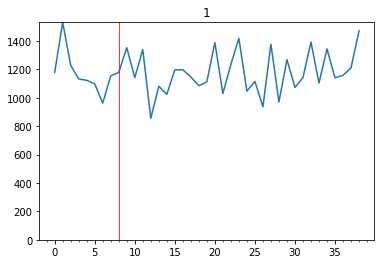

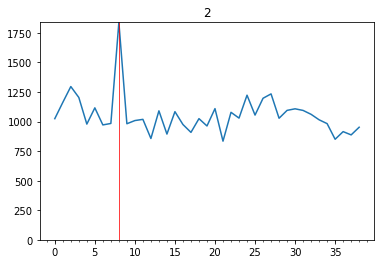

KeyboardInterrupt: 

In [89]:
for x in LGmin:
    maSeries = normal.loc[x]
    #maSeries = calcMA(tmp)
    printMA(maSeries, x)
    input()

In [88]:
df[:10]

,Business Unit Number,Business Unit Long Name,Trading Week,Layout Group,Layout Group Name,Line Sales SUs,Full Price Sales,Offers,Reductions,Line Sales,Line Cost of Sales,Line Sales VAT,Contribution 1,Line Expl Wstg @ cost,Contribution 2,Apportioned Bonuses,Contribution 3
0,202,Banstead,2013(01),1,BABY FOOD,916.00,1397.90,57.429988,0.00,1340.470012,963.931687,21.116648,355.421677,0.000000,355.421677,0.000000,355.421677
1,202,Banstead,2013(01),2,BABYCARE,402.00,1329.67,23.640000,0.00,1306.030000,912.408331,117.778274,275.843395,0.000000,275.843395,10.610930,286.454325
2,202,Banstead,2013(01),3,BACON,1871.82,5966.34,363.560041,24.18,5578.599959,4406.010202,0.000000,1172.589757,25.515308,1147.074449,0.000000,1147.074449
3,202,Banstead,2013(01),5,STAMPS,45.00,241.20,0.000000,0.00,241.200000,220.485553,0.000000,20.714447,0.000000,20.714447,0.000000,20.714447
4,202,Banstead,2013(01),6,BRANCH DINING ROOMS,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,202,Banstead,2013(01),7,CAFES,559.00,1302.95,0.000000,6.15,1296.800000,289.570600,216.133295,791.096105,0.000000,791.096105,0.000000,791.096105
6,202,Banstead,2013(01),104,TINNED LOAVES (CRUSTY),835.99,958.01,0.000000,63.92,894.090000,543.891720,0.000000,350.198280,21.991000,328.207280,0.000000,328.207280
7,202,Banstead,2013(01),106,PATISSERIE SELF SERVE,2228.05,1534.80,48.130004,202.37,1284.299996,793.647987,10.199995,480.452014,15.197917,465.254097,0.000000,465.254097
8,202,Banstead,2013(01),107,FINE RED WINES,114.00,1422.76,21.245265,0.00,1401.514735,779.457081,233.585780,388.471874,0.000000,388.471874,-18.704088,369.767786
9,202,Banstead,2013(01),108,FINE WHITE WINES,81.00,973.39,13.927296,0.00,959.462704,534.494216,159.910442,265.058046,0.000000,265.058046,10.311420,275.369466
